# Scenario :

'Suppose you are working as compliance data science analyst in a firm. One of your task is to monitor internal communications in order to better understand employees’ moods and assess any potential risks. You can leverage sentiment analysis technology which has become a form of risk management and is emerging as a useful risk control tool for a variety of businesses to identify and address regulatory risk issues, compliance problems and potential fraud.'


# Dataset Description :

You have received a dataset which contains 3 columns:
- ID (Unique identifier for a sentence)
- label (1-Positive & 0-Negative)
- Text (Sentences)

# Evaluation Criteria :

1. This assignment has been divided in to 3 sections. Section 3 will be evaluated only if you score well in the section 1 and section 2. 
2. Write your codes only in the coding area. You can add more cells for your analysis.
3. You can leverage R or Python programming language for solving the assignment.

# Programming best practices :

1. You need to explicitly import all the packages/libaries at the starting of the notebook.
2. For any non trivial pieces of code, please write supporting comments.
3. All the cells should run with no error.

# Submission guidelines :

There are 2 files you need to zip and attach:
1. Final complied jupyter notebook.
2. Save the Jupyter notebook as .html and attach the same.

################################################# Assignment start ###########################################################

In [12]:
# import the necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import  f1_score,accuracy_score
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from numpy import loadtxt
from keras.models import load_model

In [48]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riya.agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riya.agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Read the dataset and print the schema

harassment=pd.read_csv("sentiment_data.csv")
print(harassment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15428 entries, 0 to 15427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    15420 non-null  object
 1   label   15428 non-null  int64 
 2   ID      15425 non-null  object
dtypes: int64(1), object(2)
memory usage: 361.7+ KB
None


In [50]:
harassment.head()

,Text,label,ID
0,i didnt feel humiliated,0,W0
1,i can go from feeling so hopeless to so damned...,0,W1
2,im grabbing a minute to post i feel greedy wrong,0,W2
3,i am ever feeling nostalgic about the fireplac...,1,W3
4,i am feeling grouchy,0,W4


### Section 1

#### Q1. How many Unique Ids are there in the dataset ?  ( *Look for exact answer)

In [15]:
#get unique ids in the dataset

harassment["ID"].nunique()

15423

Unique Ids in the dataset are: 15423

#### Q2. How many total missing values are there across all columns in the dataset?          ( *Look for exact answer)

In [16]:
#total missing values across columns

harassment.isnull().sum()

Text     8
label    0
ID       3
dtype: int64

Total missing values across all the columns in the dataset are : 11

#### Q3. How many rows are there in the dataset after dropping the rows containing the missing values and removing duplicates (keep first occurence in case of duplicates)? ( *Look for exact answer)

In [17]:
#drop rows with missing values
harassment.dropna(axis=0, inplace=True)

#drop rows with duplicates
harassment.drop_duplicates(keep='first', inplace=True)

#number of rows
harassment.shape[0]

15417

rows in the dataset after dropping the rows containing the missing values and removing duplicates are: 15417

#### Q4. What is the percentage of positive labels in the dataset ? ( *Look for exact answer)

In [18]:
(harassment["label"].sum()/harassment.shape[0])*100

43.19906596614127

percentage of positive labels in the dataset is: 43.19

In [19]:
# Create X and Y and print the shape

X=harassment.Text
y=harassment.label
print(X.shape)
print(y.shape)

(15417,)
(15417,)


#### Q5. How many unique tokens are present in the dataset including stop words ? ( *Look for code and analysis)

In [20]:
#create text corpus
text = harassment.Text.str.cat(sep=' ')

#tokenize the corpus
tokens = word_tokenize(text)

#get unique tokens 
uniq_tokens=set(tokens)

#number of unique tokens in the text
print(len(uniq_tokens))

14911


Unique Tokens including stop words: 14911

#### Q6. How many unique tokens are present in the dataset excluding english stop words ? ( *Look for code and analysis)

In [22]:
# get english stop words
stop_words = set(stopwords.words('english'))

#remove stopwords from the tokens
tokens = [w for w in tokens if not w in stop_words]

# get unique token excluding stopwords
uniq_tokens_nostop=set(tokens)

# unique tokens are present in the dataset excluding english stop words
print(len(uniq_tokens_nostop))

14763


Unique Tokens excluding stop words: 14763

### Section 2

#### Q7. What is Zipf distribution and Plot Zipf distribution for 500 tokens in decreasing order including stop words ? ( *Look for descriptive answer, code and plot)

The zeta distribution comes from Zipf’s law, which states that, given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.
The rank-frequency distribution is an inverse relationship.

In [23]:
# create rank-frequency lists for the text tokens including stop words

tokens = word_tokenize(text)
fd=nltk.FreqDist()
ranks = []
freqs = []
for i in tokens:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

Text(0.5, 1.0, "Zipf's Distribution")

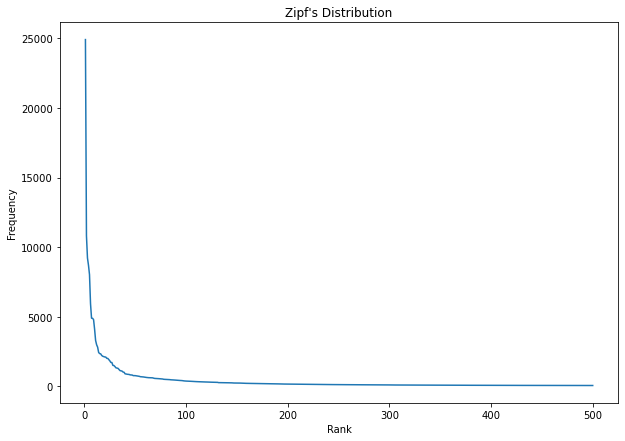

In [24]:
#Plotting the Zipf distribution
fig, ax = plt.subplots(figsize=(10, 7))

#consider only top 500 tokens
ax.plot(ranks[0:500],freqs[0:500])

ax.set_xlabel('Rank')
ax.set_ylabel('Frequency')
ax.set_title("Zipf's Distribution")


#### Q8. Plot frequency disribution of top 50 tokens in negative data including stop words

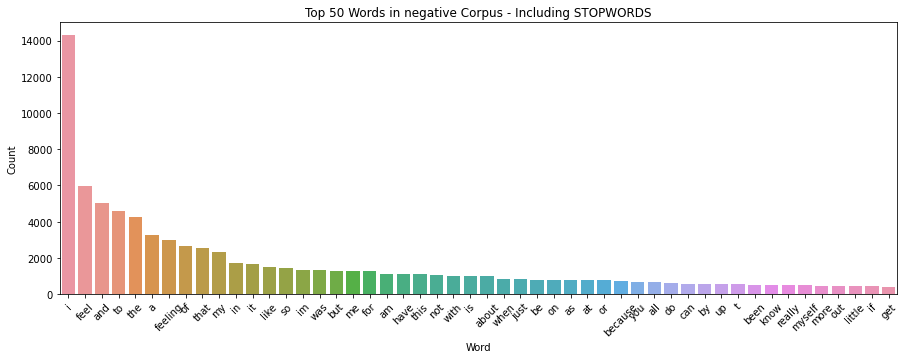

In [25]:
#get negative data
neg_data=harassment[harassment["label"]==0]

#create negative data corpus
neg_text = neg_data.Text.str.cat(sep=' ')

#get the tokens including stopwords
neg_tokens = word_tokenize(neg_text)

#get frequency distribution for the tokens
neg_freq_dist = nltk.FreqDist(neg_tokens)

#get top 50 tokens and their count
labels = [element[0] for element in neg_freq_dist.most_common(50)]
counts = [element[1] for element in neg_freq_dist.most_common(50)]

#plot frequency distribution
plt.figure(figsize=(15,5))
plt.title("Top 50 Words in negative Corpus - Including STOPWORDS")
plt.ylabel("Count")
plt.xlabel("Word")
plt.xticks(rotation=45)
plot = sns.barplot(labels,counts)


#### Q9. Plot frequency disribution of top 50 tokens in positive data including stop words

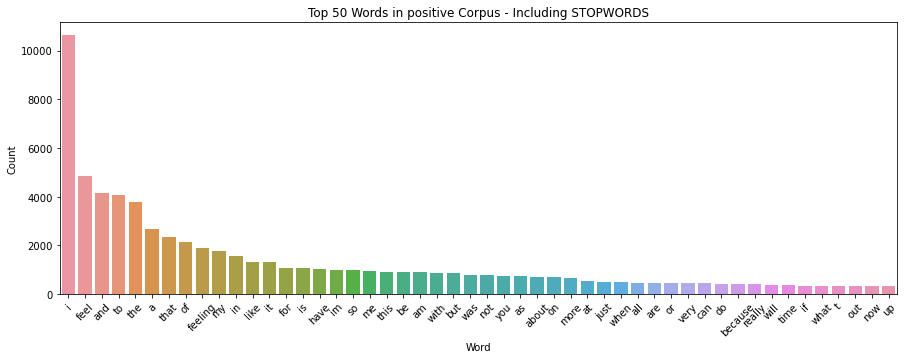

In [26]:
#get positive data
pos_data=harassment[harassment["label"]==1]

#create positive data corpus
pos_text = pos_data.Text.str.cat(sep=' ')

#get the tokens including stopwords
pos_tokens = word_tokenize(pos_text)

#get frequency distribution for the tokens
pos_freq_dist = nltk.FreqDist(pos_tokens)

#get top 50 tokens and their count
labels = [element[0] for element in pos_freq_dist.most_common(50)]
counts = [element[1] for element in pos_freq_dist.most_common(50)]

#plot frequency distribution
plt.figure(figsize=(15,5))
plt.title("Top 50 Words in positive Corpus - Including STOPWORDS")
plt.ylabel("Count")
plt.xlabel("Word")
plt.xticks(rotation=45)
plot = sns.barplot(labels,counts)

### Section 3

#### Q10. If you have to predict the sentiments then explain the ML life cycle in detail ?

ML life cycle will start with the collection of text data -> cleaning the data, remove punctuation, special character etc. -> generalization and tokenization, removing stop words -> stemming/Lemmetization, convert words to base form -> feature extraction -> train the model using different algorithms for sentiment analysis -> save the model as classifier -> test the saved classifier on unseen data after feature extraction -> improve the accuracy by hyperparameter tuning -> deployment -> improve the model by collecting more data

#### Q11. Identify the suitable embedding for input features and build a Machine Learning model to predict the sentiments ?

Word Embedding represents words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as TensorFlow, Keras, this part is usually handled by an embedding layer which stores a lookup table to map the words represented by numeric indexes to their dense vector representations. Hence, we will be using deep network embedding layer for input features.


WordtoVec Embedding does not give a good result and hence, we will be sticking to deep networks embedding which gives around 95% accuracy

In [27]:
#check the data

harassment.head()

,Text,label,ID
0,i didnt feel humiliated,0,W0
1,i can go from feeling so hopeless to so damned...,0,W1
2,im grabbing a minute to post i feel greedy wrong,0,W2
3,i am ever feeling nostalgic about the fireplac...,1,W3
4,i am feeling grouchy,0,W4


In [28]:
#data to train the model
x_train=harassment.loc[:12000,'Text'].values
y_train=harassment.loc[:12000,'label'].values

# data to validate the model
x_test=harassment.loc[12001:15000,'Text'].values
y_test=harassment.loc[12001:15000,'label'].values

#unseen data for testing
x_val=harassment.loc[15001:,'Text'].values
y_val=harassment.loc[15001:,'label'].values

In [29]:
tokenizer_obj= Tokenizer()
total_data= harassment.loc[:15000,'Text'].values
tokenizer_obj.fit_on_texts(total_data)

max_len=max([len(s.split()) for s in total_data])

vocab_size= len(tokenizer_obj.word_index)+1

#encode the text data so that each word is represented by a unique integer
x_train_tokens=tokenizer_obj.texts_to_sequences(x_train)
x_test_tokens= tokenizer_obj.texts_to_sequences(x_test)

#add padding to make all the vectors of same length (max_length)
x_train_pad=pad_sequences(x_train_tokens, maxlen=max_len,padding='post')
x_test_pad=pad_sequences(x_test_tokens, maxlen=max_len,padding='post')

In [30]:
EMBEDDING_DIM=100

print('Model Building')

model= Sequential()

#embedding layer is the first hidden layer
model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length=max_len))

model.add(GRU(units=32, dropout=0.2))

#fully connected layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model Building


We can see from below training epochs that the model after few epoch is improving the accuracy. After a few epochs we reach validation accuracy of around 97%. 

In [31]:
#train the model

print ('train model')

model.fit(x_train_pad,y_train, batch_size=128,epochs=20, validation_data=(x_test_pad,y_test),verbose=2)

train model
Epoch 1/20
94/94 - 8s - loss: 0.6852 - accuracy: 0.5619 - val_loss: 0.6804 - val_accuracy: 0.5797
Epoch 2/20
94/94 - 6s - loss: 0.6851 - accuracy: 0.5649 - val_loss: 0.6808 - val_accuracy: 0.5797
Epoch 3/20
94/94 - 6s - loss: 0.6852 - accuracy: 0.5649 - val_loss: 0.6805 - val_accuracy: 0.5797
Epoch 4/20
94/94 - 6s - loss: 0.6848 - accuracy: 0.5649 - val_loss: 0.6804 - val_accuracy: 0.5797
Epoch 5/20
94/94 - 7s - loss: 0.6851 - accuracy: 0.5649 - val_loss: 0.6804 - val_accuracy: 0.5797
Epoch 6/20
94/94 - 7s - loss: 0.6848 - accuracy: 0.5649 - val_loss: 0.6805 - val_accuracy: 0.5797
Epoch 7/20
94/94 - 7s - loss: 0.6856 - accuracy: 0.5649 - val_loss: 0.6810 - val_accuracy: 0.5797
Epoch 8/20
94/94 - 7s - loss: 0.6849 - accuracy: 0.5649 - val_loss: 0.6808 - val_accuracy: 0.5797
Epoch 9/20
94/94 - 6s - loss: 0.6849 - accuracy: 0.5649 - val_loss: 0.6808 - val_accuracy: 0.5797
Epoch 10/20
94/94 - 7s - loss: 0.6848 - accuracy: 0.5649 - val_loss: 0.6804 - val_accuracy: 0.5797
Epoch 1

Check the model on unseen data and see how the model is predicting the sentiments.

In [32]:
#encode the text data so that each word is represented by a unique integer
test_samples_token=tokenizer_obj.texts_to_sequences(x_val)

#add padding to make all the vectors of same length as of train data (max_length)
test_samples_token_pad=pad_sequences(test_samples_token,maxlen=max_len)

In [39]:
#predict on new data
pred=model.predict(x=test_samples_token_pad)

#one hot encoding for the predictions
pred=np.concatenate(pred).ravel()
pred_binary=np.where(pred>0.5,1,0)

In [40]:
#get confusion matrix for predictions

outcome=pd.DataFrame(list(zip(pred_binary,y_val)),columns=['predicted','real'])
k=pd.crosstab(outcome['real'],outcome["predicted"])
print(k)

predicted    0    1
real               
0          230   15
1            5  177


In [41]:
f1_score(outcome['real'],outcome["predicted"])

0.9465240641711229

In [42]:
accuracy_score(outcome['real'],outcome["predicted"])

0.9531615925058547

#### Q12. Idenify the suitable Model validation matrix and explain why you have chosen the same ?

Suitable validation matrix in this case could be Accuracy. The data has positive rate of 43.19 which means the data is more or less balanced and accuracy is good measure for validation in case of balanced data.

Accuray: 95.31%

#### Q13. What are the model serialization techniques ?

Serialization is the process of translating data structures or object state into a format that can be stored or transmitted and reconstructed later.In serialization, an object is transformed into a format that can be stored, so as to be able to deserialize it later and recreate the original object from the serialized format in the context of data storage.

Few of the model serialization techniques are:

JSON: Any Python object can be serialized into JSON format and vice versa.Without involving any objects as well, JSON strings can be formed and interchanged between any two processes, client and server as data.Several REST APIs and web services return data as JSON. Even the error messages from the REST APIs are returned as JSON strings.

Pickle: Pickling is the process whereby a Python object hierarchy is converted into a byte stream (usually not human readable) to be written to a file.Pickle is operationally simplest way to store the object. The Python Pickle module is an object-oriented way to store objects directly in a special storage format.

Joblib: The joblib package provides dump and load functions for serializing Python objects, with particular optimizations for large numpy arrays. It is intended to be a drop-in replacement for pickle and can be effective for sklearn models which store lots of data internally, such as random forest or cluster-based classifiers.

dill: The dill package extends the functionality of pickle by enabling the serialization of a much larger set of Python objects
Example of manually saving and restoring objects using JSON. This approach allows us to select the data which needs to be saved, such as the model parameters, coefficients, training data, and anything else we need.

hdf5: Keras is a simple and powerful Python library for deep learning.We can save keras model from disk using .h5 file and load them up again to make predictions.

#### Q14. Leverage the best serialization technique and convert your model ?

Since I have built keras model for prediction of sentiments, the best serialization technique is hdf5.

In [43]:
# save model and architecture to single file
model.save("harassment_model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
# Saved model can then be loaded later by calling the load_model() function and passing
# the filename. The function returns the model with the same architecture and weights.
# load and evaluate a saved model

 
# load model
model = load_model('harassment_model.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 66, 100)           1468300   
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,481,197
Trainable params: 1,481,197
Non-trainable params: 0
_________________________________________________________________


In [47]:
#check if loaded model works properly

pred=model.predict(x=test_samples_token_pad)

#one hot encoding for the predictions
pred=np.concatenate(pred).ravel()
pred_binary=np.where(pred>0.5,1,0)

outcome=pd.DataFrame(list(zip(pred_binary,y_val)),columns=['predicted','real'])
k=pd.crosstab(outcome['real'],outcome["predicted"])
print(k)

predicted    0    1
real               
0          230   15
1            5  177


In [ ]:
#_______________________________________END_______________________________________________